# <center><font color="blue">PUBG GAME PREDICTION</font></center>

<center><img src="https://media3.giphy.com/media/ENKIpXBKHuGCmEEJjH/giphy.gif?cid=ecf05e47hvm1unpxc6b5j4dr58vfwveecqu283e902w65suc&ep=v1_gifs_gifId&rid=giphy.gif&ct=g"></center>

## Table Content
1. [Importing Libraries](#import)
2. [Reading Data](#read)
3. [Data Wrangling](#wrangling)
4. [Analysis of Data](#analysis)
5. [Feature Engineering](#feature)
6. [ML - CatBoost Model](#catboost)
7. [Linear Regression](#regression)
8. [Comparing CatBoos and Linear Regression](#compare)

## <font color="green"> Importing Libraries<a class="anchor" id ="import"></font>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 6)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import catboost as cb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## <font color="green"> Reading Data<a class="anchor" id ="read"></font>

In [2]:
df=pd.read_csv("PUBG_Game_Prediction_data.csv")

In [3]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
df.shape

(4446966, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

#  <font color="green"> Data Wrangling<a class="anchor" id ="wrangling"></font>

In [6]:
df.dropna(subset=['winPlacePerc'],inplace=True)
df['winPlacePerc'].isnull().sum()


0

### Understanding Players distribution in a game


In [7]:
# prepare new parameter to know how many players are in a game
df['playerJoined']=df.groupby('matchId')['matchId'].transform('count')

In [8]:
df.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


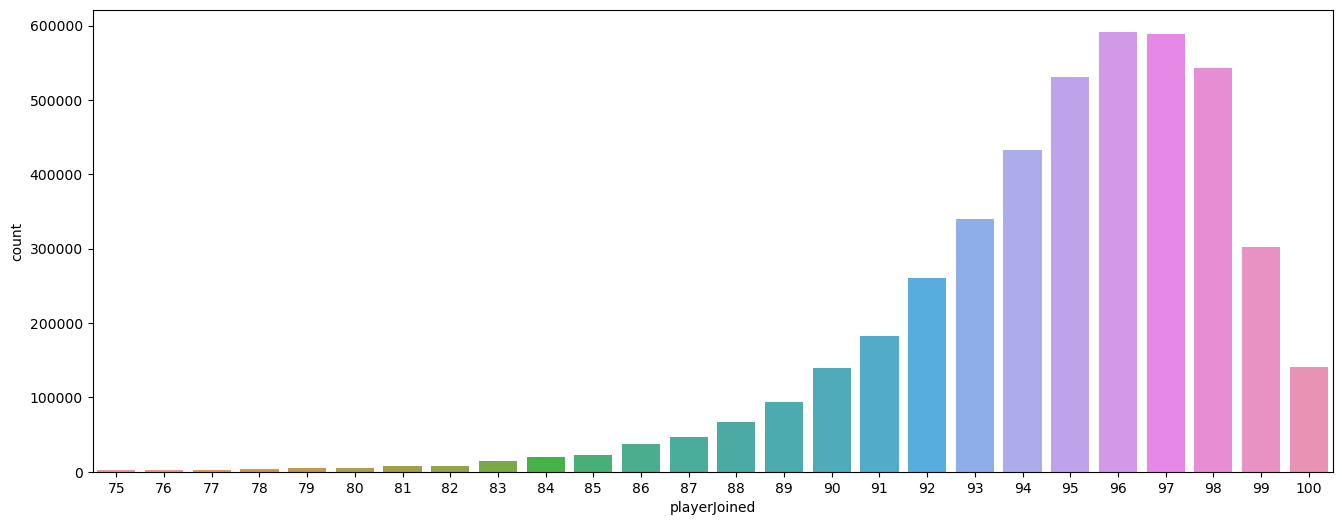

In [9]:
sns.countplot(x='playerJoined',data=df[df['playerJoined'] >= 75])  
plt.show()


# Analysing the data<a class="anchor" id ="analysis">

#### Kills Without Moving?

 <img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExZHlzcWJ6d3g1OXN0M3g4aHhrYnZ2c3I4YTcwajQ5YWZkMmQ0cGQ1eiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/Z5DB5iEJipjRC/giphy.webp">

In [10]:
# prepare a data parameter to gather the information of the total distance travelled
df['totalDistance']=df['walkDistance']+df['swimDistance']+df['rideDistance']
df['killswithoutMoving']=((df['totalDistance']==0)&(df['kills']>0))

In [11]:
df[df['killswithoutMoving']==True].shape

(1535, 32)

In [12]:
df.drop(df[df['killswithoutMoving']==True].index,inplace=True)

####  Extra-ordinary Road Kills?????

<img src="https://media1.tenor.com/m/_c-d5CHL1cwAAAAC/pubg-road-kill.gif">

In [13]:
df[df['roadKills']>5].shape
df.drop(df[df['roadKills']>5].index,inplace=True)

####  So many KILLS - how ????

<img src="https://i.makeagif.com/media/12-13-2018/77-HV7.gif">


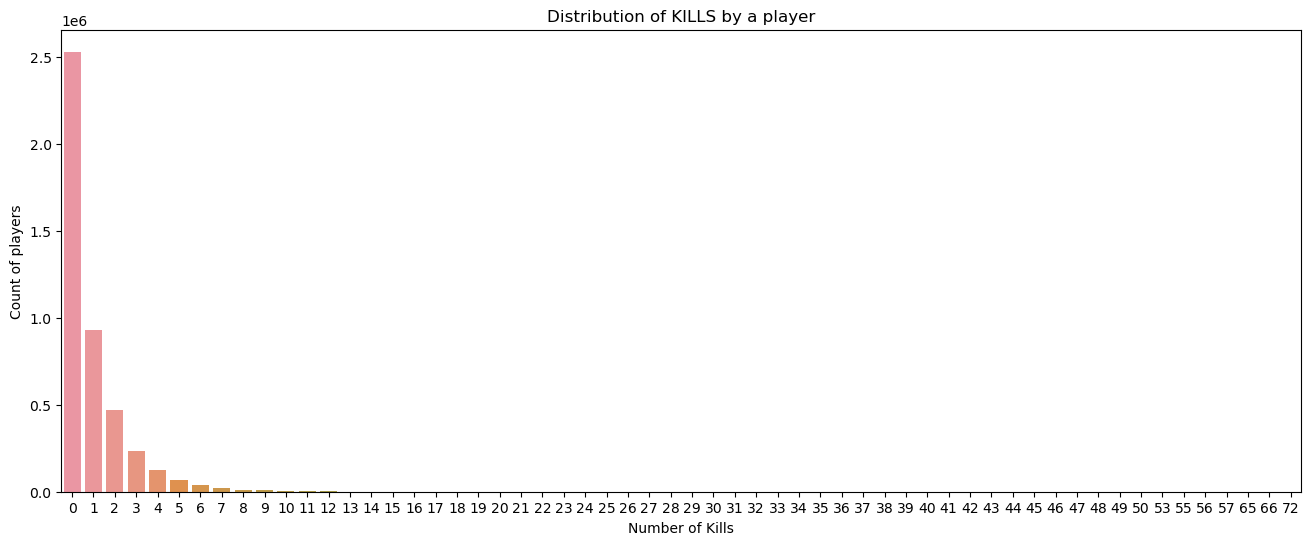

In [14]:
sns.countplot(data=df,x=df['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

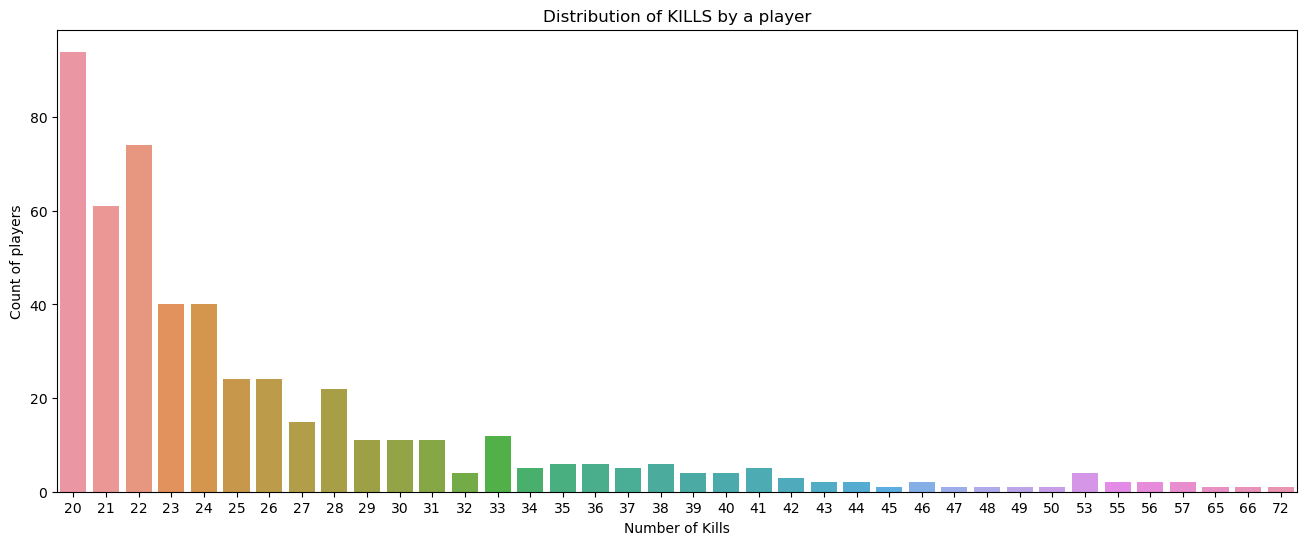

In [15]:
sns.countplot(x='kills', data=df[df['kills'] >= 20]).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()


In [16]:
df[df['kills']>20].shape

(417, 32)

In [17]:
df.drop(df[df['kills']>20].index,inplace=True)

#### Head Shot


<img src="https://media.giphy.com/media/l3mZrOajz5VCZf7Hy/giphy.gif">

In [18]:
df["headshot_rate"]=df["headshotKills"]/df['kills']
df["headshot_rate"]=df["headshot_rate"].fillna(0)

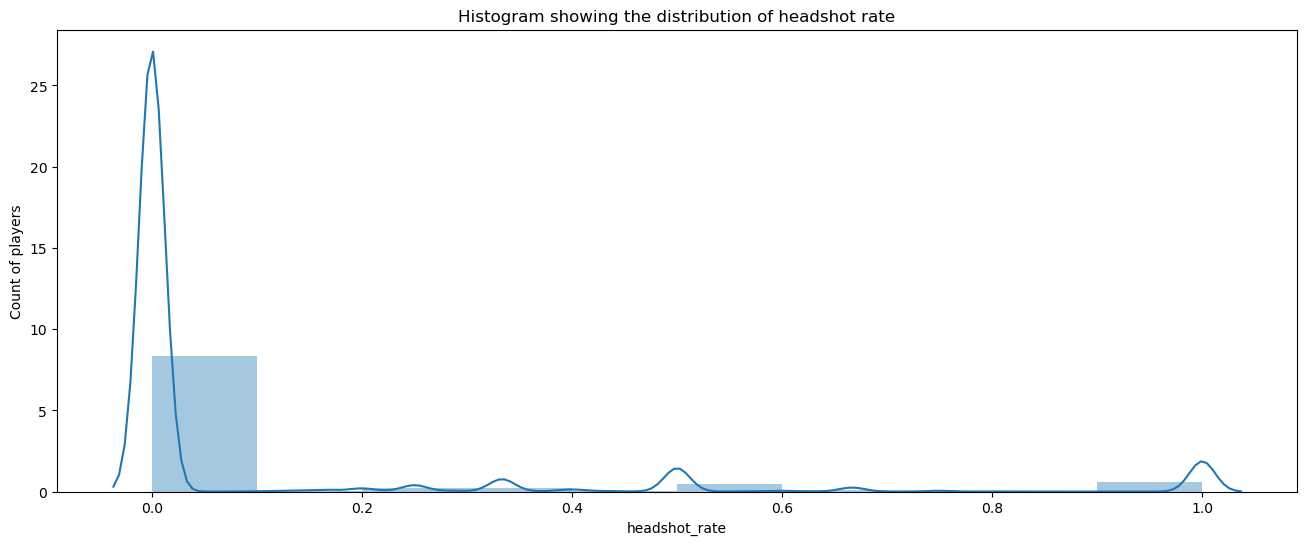

In [19]:
sns.distplot(df["headshot_rate"],bins=10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()

In [21]:
df.drop(df[(df["headshot_rate"]==1) & (df['kills']>6)].index,inplace=True)

#### Longest Shot

<img src="https://media.tenor.com/w2eclakTdqMAAAAM/pubg-video-game.gif">

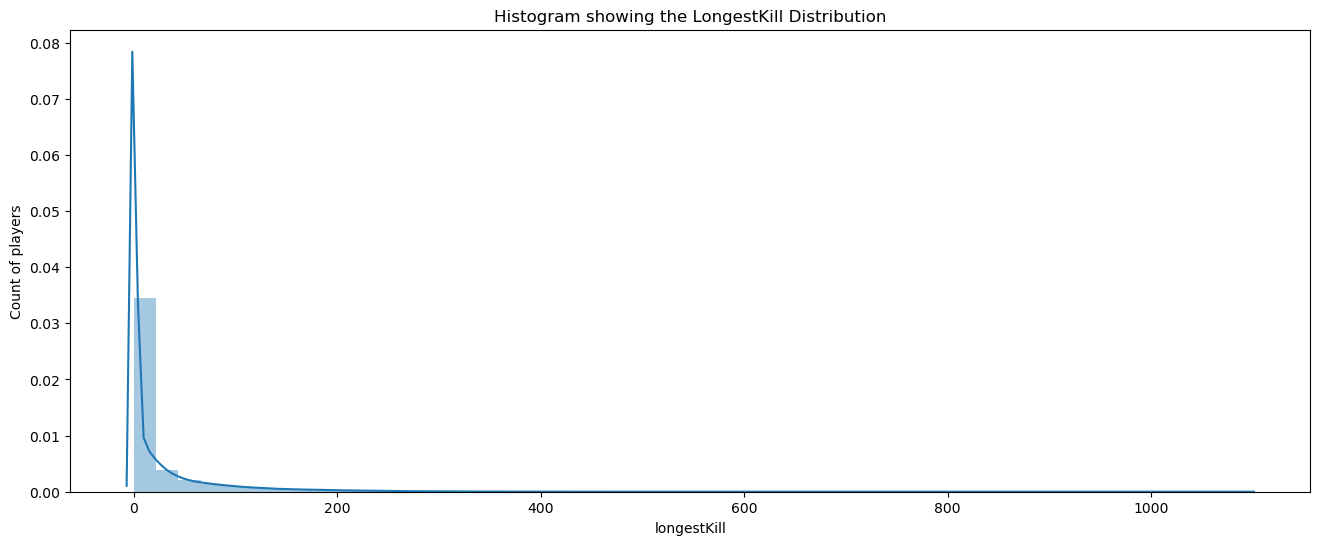

In [24]:
sns.distplot(df['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

In [26]:
df[df["longestKill"]>500].shape

(1745, 33)

In [27]:
df.drop(df[df["longestKill"]>500].index,inplace=True)

#### Weapon Change


<img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExZWU1c3kzcDN0Y2lnZW5mZDlqd2x1YWI0eDZ2NXJkNGt0eW85dTFxaiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/VwGyNp25HzBgFFmviV/giphy.webp">

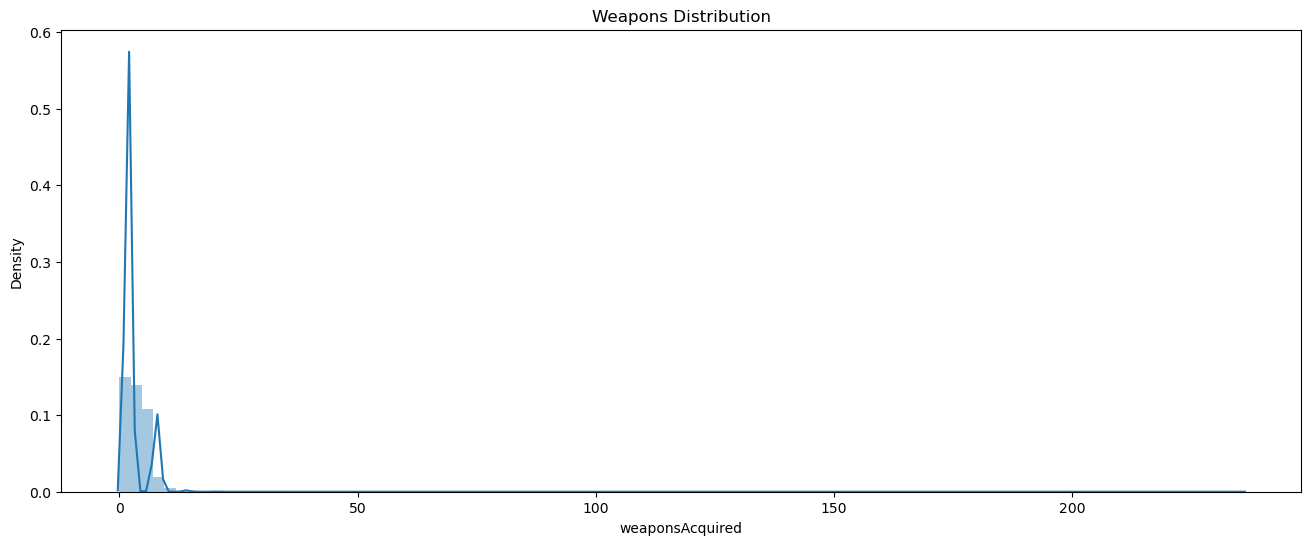

In [28]:
sns.distplot(df["weaponsAcquired"],bins=100).set_title("Weapons Distribution")
plt.show()

In [29]:
df[df["weaponsAcquired"]>15].shape

(5435, 33)

In [30]:
df.drop(df[df["weaponsAcquired"]>15].index,inplace =True)

## EDA

In [31]:
df.shape

(4437682, 33)

In [32]:
df.isna().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playerJoined          0
totalDistance         0
killswithoutMoving    0
headshot_rate         0
dtype: int64

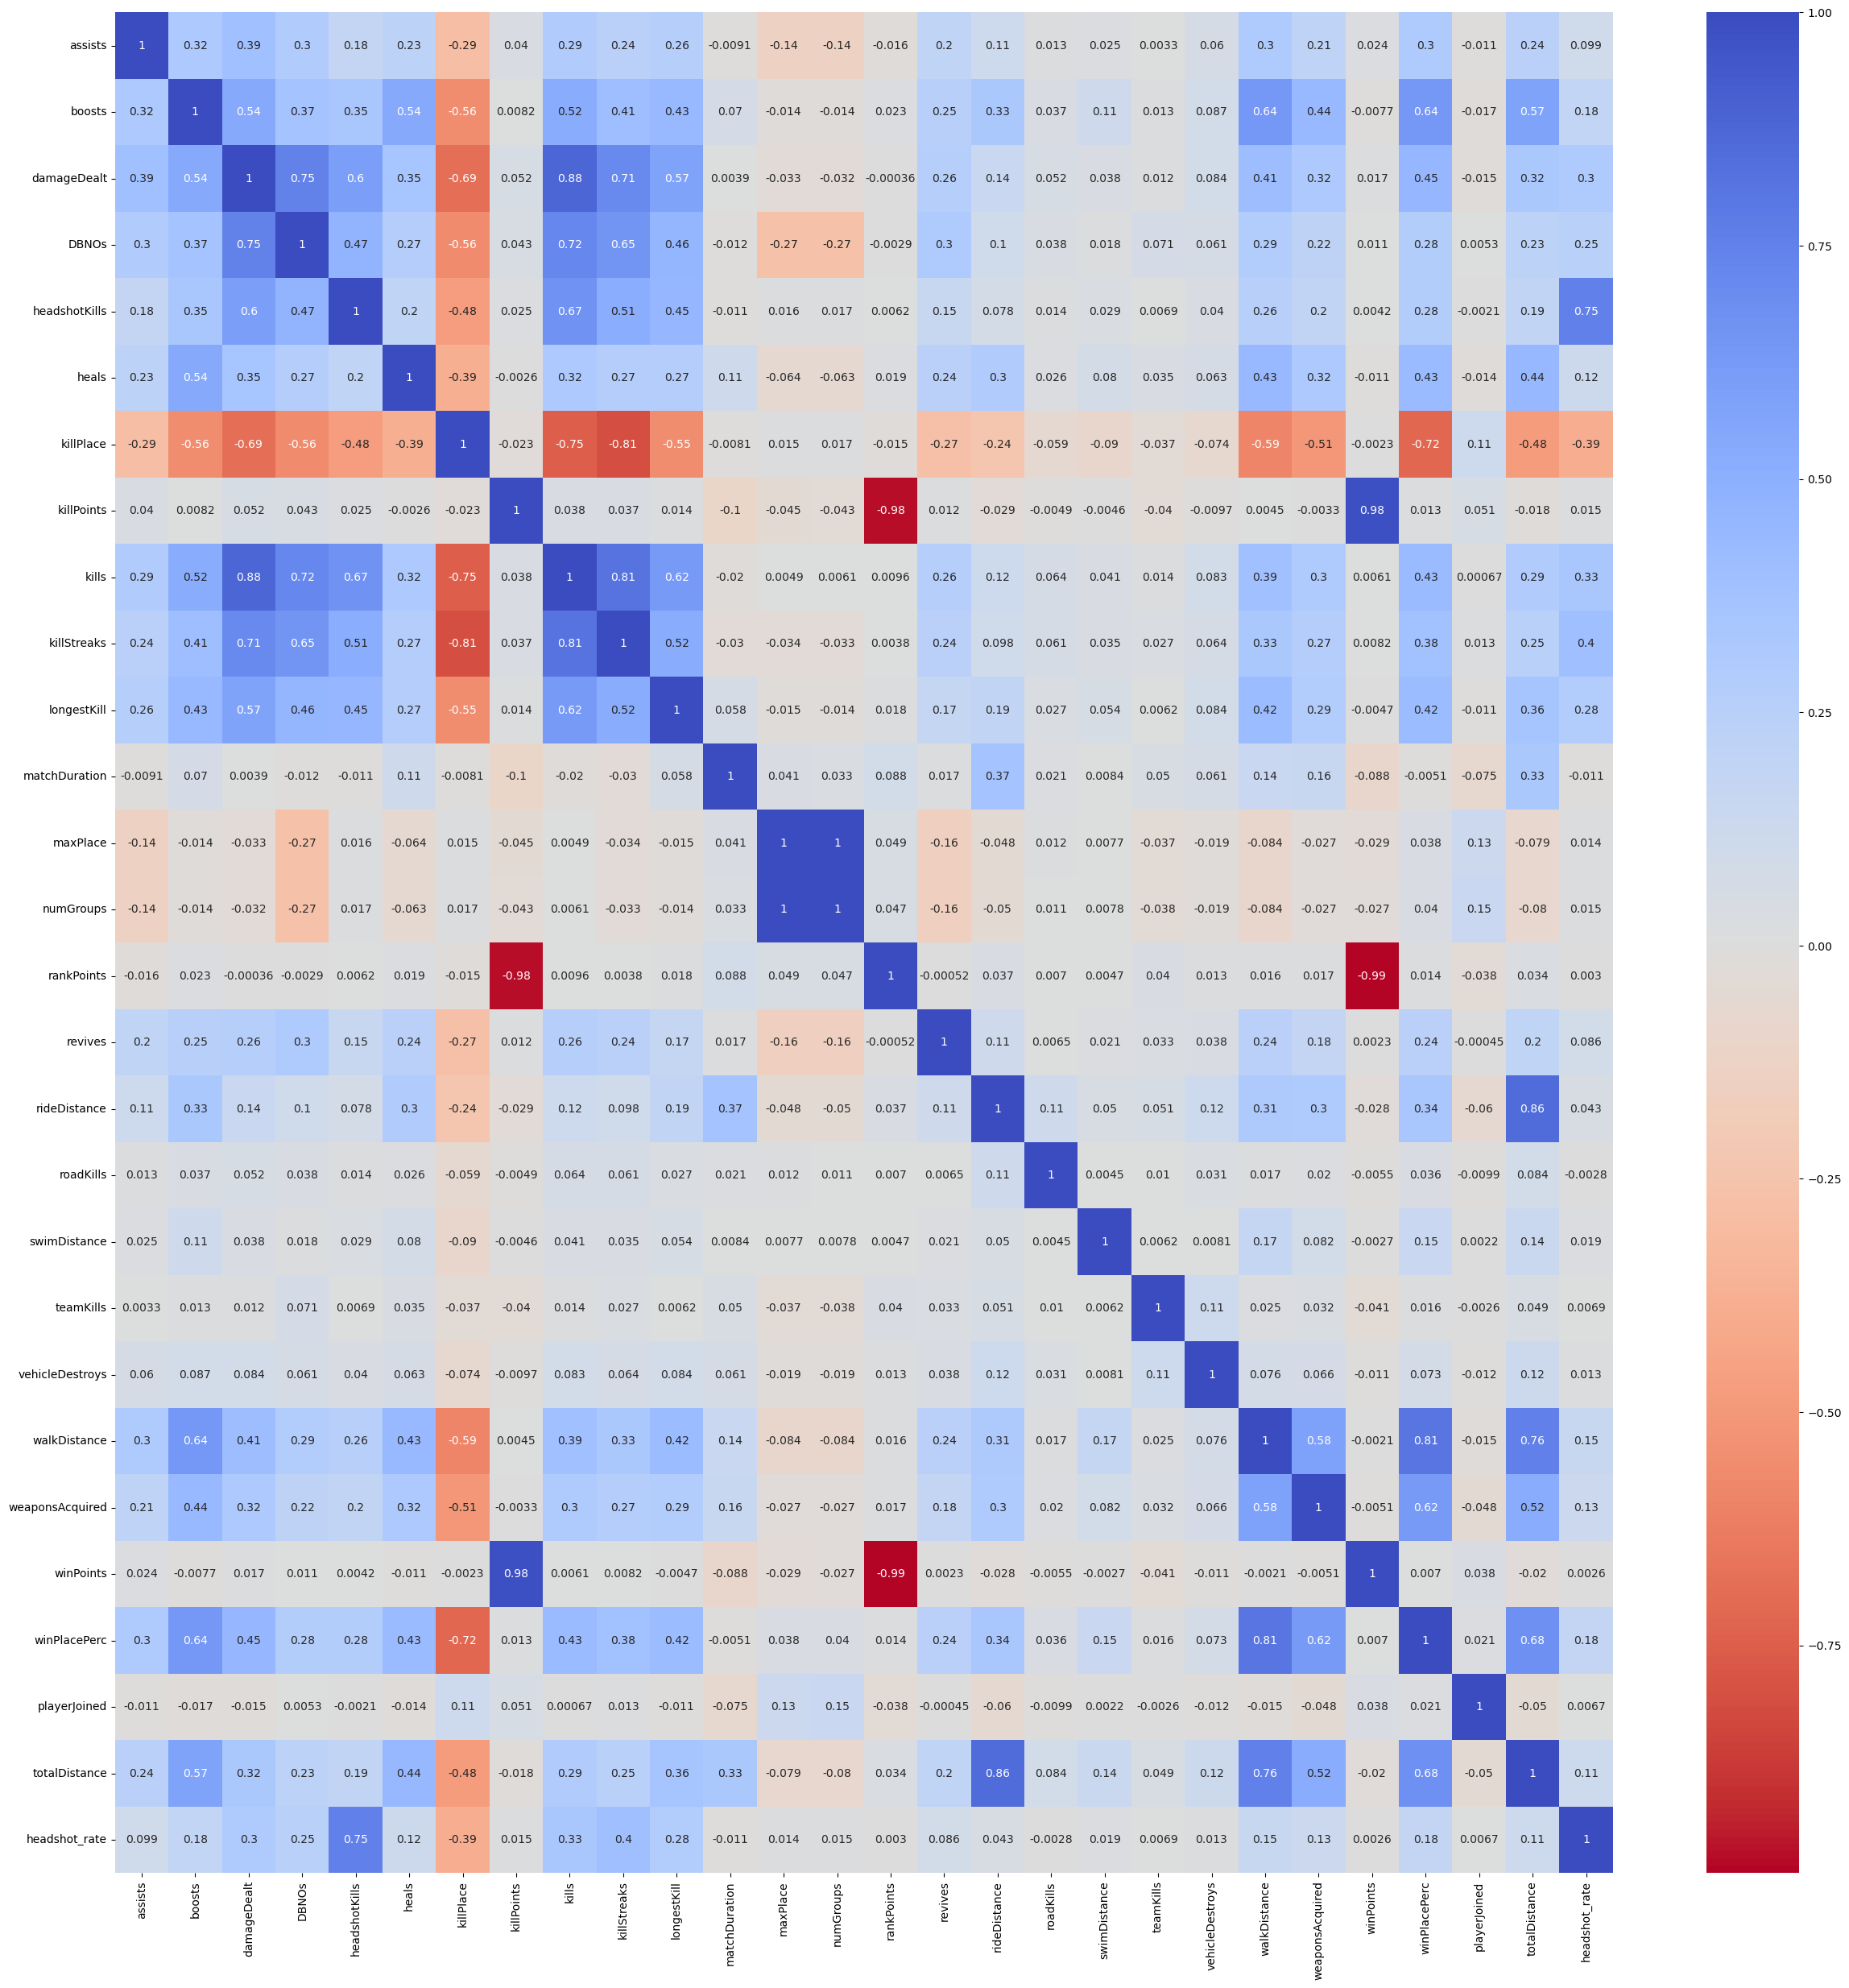

In [44]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=[30,30])
sns.heatmap(numeric_df.corr(), annot = True, cmap='coolwarm_r')
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4437682 entries, 0 to 4446965
Data columns (total 33 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   groupId             object 
 2   matchId             object 
 3   assists             int64  
 4   boosts              int64  
 5   damageDealt         float64
 6   DBNOs               int64  
 7   headshotKills       int64  
 8   heals               int64  
 9   killPlace           int64  
 10  killPoints          int64  
 11  kills               int64  
 12  killStreaks         int64  
 13  longestKill         float64
 14  matchDuration       int64  
 15  matchType           object 
 16  maxPlace            int64  
 17  numGroups           int64  
 18  rankPoints          int64  
 19  revives             int64  
 20  rideDistance        float64
 21  roadKills           int64  
 22  swimDistance        float64
 23  teamKills           int64  
 24  vehicleDestroys     int64  
 

# <font color="green"> Feature Engineering<a class="anchor" id ="feature"></font>


In [45]:
normalising_factor=(100-df['playerJoined']/100)+1

In [46]:
df['killsNorm']=df['kills']*normalising_factor
df['damageDealtNorm']=df['damageDealt']*normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor

df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [47]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerJoined',
       'totalDistance', 'killswithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [48]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [49]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


# <font color="green"> ML - Catboost Model<a class="anchor" id ="catboost"></font>

### Handling categorical data

In [66]:
x=data.drop(['winPlacePerc'],axis=1)
y=data['winPlacePerc']

In [67]:
x = pd.get_dummies(x, columns = ['matchType', 'killswithoutMoving'])

In [68]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killswithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,False,False,False,False,False,False,False,False,True,True
1,0,0,57,0,0,0.00,25,1484,0,0,...,False,False,False,False,False,False,False,False,True,True
2,0,0,47,0,0,0.00,47,1491,0,0,...,False,False,False,False,False,False,False,False,False,True
3,0,0,75,0,0,0.00,30,1408,0,0,...,False,False,False,False,False,False,False,False,True,True
4,0,0,45,0,1,58.53,95,1560,0,0,...,False,False,False,False,False,False,True,False,False,True


In [69]:
x.shape

(4437682, 40)

In [70]:
features = x.columns

#### Scaling the data


In [71]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x))

In [72]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582712,-0.383999,0.449564,1.172537,-0.765156,-0.459684,-0.732763,-1.212394,-0.049576,-0.142531,...,-0.033643,-0.005516,-0.013898,-0.008425,-0.054801,-0.206548,-0.370783,-0.405077,1.236300,0.0
1,-0.582712,-0.383999,0.340274,-0.804724,-0.765156,-0.459684,-0.775734,0.803562,-0.049576,-0.142531,...,-0.033643,-0.005516,-0.013898,-0.008425,-0.054801,-0.206548,-0.370783,-0.405077,1.236300,0.0
2,-0.582712,-0.383999,-0.024027,-0.804724,-0.765156,-0.459684,0.169630,0.813065,-0.049576,-0.142531,...,-0.033643,-0.005516,-0.013898,-0.008425,-0.054801,-0.206548,-0.370783,-0.405077,-0.808865,0.0
3,-0.582712,-0.383999,0.996015,-0.804724,-0.765156,-0.459684,-0.560878,0.700389,-0.049576,-0.142531,...,-0.033643,-0.005516,-0.013898,-0.008425,-0.054801,-0.206548,-0.370783,-0.405077,1.236300,0.0
4,-0.582712,-0.383999,-0.096888,-0.804724,0.647425,0.727044,2.232242,0.906736,-0.049576,-0.142531,...,-0.033643,-0.005516,-0.013898,-0.008425,-0.054801,-0.206548,2.696994,-0.405077,-0.808865,0.0


#### Splitting data

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [74]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3106377, 40) (3106377,)
(1331305, 40) (1331305,)


## CatBoost Model

In [76]:
import catboost as cb

In [78]:
train_datset=cb.Pool(x_train,y_train)
test_dataset=cb.Pool(x_test,y_test)

In [79]:
model=cb.CatBoostRegressor(loss_function="RMSE")

In [81]:
grid={
    'iterations':[100,150],
    'learning_rate':[0.03,0.1],
    'depth': [2, 4, 6, 8]
    
}
model.grid_search(grid,train_datset)

0:	learn: 0.5483099	test: 0.5486894	best: 0.5486894 (0)	total: 946ms	remaining: 1m 33s
1:	learn: 0.5334608	test: 0.5338377	best: 0.5338377 (1)	total: 1.43s	remaining: 1m 9s
2:	learn: 0.5190872	test: 0.5194634	best: 0.5194634 (2)	total: 1.85s	remaining: 60s
3:	learn: 0.5051893	test: 0.5055628	best: 0.5055628 (3)	total: 2.32s	remaining: 55.8s
4:	learn: 0.4917086	test: 0.4920781	best: 0.4920781 (4)	total: 2.68s	remaining: 50.9s
5:	learn: 0.4786880	test: 0.4790498	best: 0.4790498 (5)	total: 3.05s	remaining: 47.9s
6:	learn: 0.4660979	test: 0.4664545	best: 0.4664545 (6)	total: 3.44s	remaining: 45.7s
7:	learn: 0.4539261	test: 0.4542794	best: 0.4542794 (7)	total: 3.85s	remaining: 44.2s
8:	learn: 0.4421267	test: 0.4424768	best: 0.4424768 (8)	total: 4.39s	remaining: 44.4s
9:	learn: 0.4307003	test: 0.4310468	best: 0.4310468 (9)	total: 5.01s	remaining: 45.1s
10:	learn: 0.4196603	test: 0.4200031	best: 0.4200031 (10)	total: 5.58s	remaining: 45.1s
11:	learn: 0.4089773	test: 0.4093146	best: 0.4093146 

94:	learn: 0.1399886	test: 0.1400363	best: 0.1400363 (94)	total: 56.9s	remaining: 2.99s
95:	learn: 0.1396057	test: 0.1396504	best: 0.1396504 (95)	total: 57.3s	remaining: 2.39s
96:	learn: 0.1392269	test: 0.1392693	best: 0.1392693 (96)	total: 58s	remaining: 1.79s
97:	learn: 0.1388751	test: 0.1389168	best: 0.1389168 (97)	total: 58.5s	remaining: 1.19s
98:	learn: 0.1384833	test: 0.1385231	best: 0.1385231 (98)	total: 58.8s	remaining: 594ms
99:	learn: 0.1381491	test: 0.1381870	best: 0.1381870 (99)	total: 59.3s	remaining: 0us

bestTest = 0.1381869946
bestIteration = 99

0:	loss: 0.1381870	best: 0.1381870 (0)	total: 1m 4s	remaining: 16m 1s
0:	learn: 0.5127181	test: 0.5130872	best: 0.5130872 (0)	total: 530ms	remaining: 52.5s
1:	learn: 0.4672045	test: 0.4675565	best: 0.4675565 (1)	total: 1.16s	remaining: 57s
2:	learn: 0.4264927	test: 0.4268229	best: 0.4268229 (2)	total: 1.69s	remaining: 54.7s
3:	learn: 0.3903326	test: 0.3906468	best: 0.3906468 (3)	total: 2.29s	remaining: 54.9s
4:	learn: 0.3582507

87:	learn: 0.1177547	test: 0.1177035	best: 0.1177035 (87)	total: 46.5s	remaining: 6.33s
88:	learn: 0.1173232	test: 0.1172731	best: 0.1172731 (88)	total: 47s	remaining: 5.81s
89:	learn: 0.1171143	test: 0.1170635	best: 0.1170635 (89)	total: 47.7s	remaining: 5.3s
90:	learn: 0.1169462	test: 0.1168933	best: 0.1168933 (90)	total: 48.3s	remaining: 4.78s
91:	learn: 0.1168365	test: 0.1167825	best: 0.1167825 (91)	total: 48.7s	remaining: 4.24s
92:	learn: 0.1167506	test: 0.1166965	best: 0.1166965 (92)	total: 49.3s	remaining: 3.71s
93:	learn: 0.1166596	test: 0.1166045	best: 0.1166045 (93)	total: 49.8s	remaining: 3.18s
94:	learn: 0.1165556	test: 0.1165044	best: 0.1165044 (94)	total: 50.3s	remaining: 2.65s
95:	learn: 0.1161241	test: 0.1160709	best: 0.1160709 (95)	total: 50.9s	remaining: 2.12s
96:	learn: 0.1160321	test: 0.1159847	best: 0.1159847 (96)	total: 51.5s	remaining: 1.59s
97:	learn: 0.1159433	test: 0.1158953	best: 0.1158953 (97)	total: 52s	remaining: 1.06s
98:	learn: 0.1158487	test: 0.1157994	

80:	learn: 0.1473843	test: 0.1474685	best: 0.1474685 (80)	total: 45s	remaining: 38.3s
81:	learn: 0.1467216	test: 0.1468029	best: 0.1468029 (81)	total: 45.5s	remaining: 37.7s
82:	learn: 0.1460394	test: 0.1461175	best: 0.1461175 (82)	total: 46s	remaining: 37.1s
83:	learn: 0.1454280	test: 0.1455030	best: 0.1455030 (83)	total: 46.5s	remaining: 36.5s
84:	learn: 0.1448523	test: 0.1449255	best: 0.1449255 (84)	total: 47s	remaining: 36s
85:	learn: 0.1442446	test: 0.1443149	best: 0.1443149 (85)	total: 47.5s	remaining: 35.4s
86:	learn: 0.1437047	test: 0.1437741	best: 0.1437741 (86)	total: 48s	remaining: 34.8s
87:	learn: 0.1431951	test: 0.1432617	best: 0.1432617 (87)	total: 48.5s	remaining: 34.2s
88:	learn: 0.1427015	test: 0.1427662	best: 0.1427662 (88)	total: 49s	remaining: 33.6s
89:	learn: 0.1422237	test: 0.1422857	best: 0.1422857 (89)	total: 49.6s	remaining: 33s
90:	learn: 0.1417645	test: 0.1418229	best: 0.1418229 (90)	total: 50.2s	remaining: 32.5s
91:	learn: 0.1412622	test: 0.1413180	best: 0.1

21:	learn: 0.1513945	test: 0.1515046	best: 0.1515046 (21)	total: 11.2s	remaining: 1m 5s
22:	learn: 0.1487529	test: 0.1488564	best: 0.1488564 (22)	total: 11.8s	remaining: 1m 5s
23:	learn: 0.1462242	test: 0.1463176	best: 0.1463176 (23)	total: 12.3s	remaining: 1m 4s
24:	learn: 0.1442835	test: 0.1443660	best: 0.1443660 (24)	total: 12.9s	remaining: 1m 4s
25:	learn: 0.1425981	test: 0.1426715	best: 0.1426715 (25)	total: 13.4s	remaining: 1m 3s
26:	learn: 0.1409073	test: 0.1409707	best: 0.1409707 (26)	total: 14s	remaining: 1m 3s
27:	learn: 0.1395005	test: 0.1395596	best: 0.1395596 (27)	total: 14.6s	remaining: 1m 3s
28:	learn: 0.1383163	test: 0.1383689	best: 0.1383689 (28)	total: 15.2s	remaining: 1m 3s
29:	learn: 0.1372030	test: 0.1372491	best: 0.1372491 (29)	total: 15.6s	remaining: 1m 2s
30:	learn: 0.1361138	test: 0.1361532	best: 0.1361532 (30)	total: 15.9s	remaining: 1m 1s
31:	learn: 0.1352652	test: 0.1353006	best: 0.1353006 (31)	total: 16.4s	remaining: 1m
32:	learn: 0.1344242	test: 0.1344509	

115:	learn: 0.1139212	test: 0.1138673	best: 0.1138673 (115)	total: 58.1s	remaining: 17s
116:	learn: 0.1138679	test: 0.1138137	best: 0.1138137 (116)	total: 58.7s	remaining: 16.6s
117:	learn: 0.1135813	test: 0.1135231	best: 0.1135231 (117)	total: 59.5s	remaining: 16.1s
118:	learn: 0.1135048	test: 0.1134508	best: 0.1134508 (118)	total: 1m	remaining: 15.7s
119:	learn: 0.1134414	test: 0.1133876	best: 0.1133876 (119)	total: 1m	remaining: 15.2s
120:	learn: 0.1133747	test: 0.1133240	best: 0.1133240 (120)	total: 1m 1s	remaining: 14.7s
121:	learn: 0.1133136	test: 0.1132628	best: 0.1132628 (121)	total: 1m 2s	remaining: 14.3s
122:	learn: 0.1130864	test: 0.1130332	best: 0.1130332 (122)	total: 1m 3s	remaining: 13.9s
123:	learn: 0.1130288	test: 0.1129751	best: 0.1129751 (123)	total: 1m 4s	remaining: 13.5s
124:	learn: 0.1128328	test: 0.1127794	best: 0.1127794 (124)	total: 1m 5s	remaining: 13.1s
125:	learn: 0.1127692	test: 0.1127152	best: 0.1127152 (125)	total: 1m 6s	remaining: 12.7s
126:	learn: 0.1125

57:	learn: 0.1589668	test: 0.1590709	best: 0.1590709 (57)	total: 49.8s	remaining: 36.1s
58:	learn: 0.1570551	test: 0.1571536	best: 0.1571536 (58)	total: 50.4s	remaining: 35s
59:	learn: 0.1552328	test: 0.1553257	best: 0.1553257 (59)	total: 51.3s	remaining: 34.2s
60:	learn: 0.1533662	test: 0.1534570	best: 0.1534570 (60)	total: 52.4s	remaining: 33.5s
61:	learn: 0.1516498	test: 0.1517361	best: 0.1517361 (61)	total: 53s	remaining: 32.5s
62:	learn: 0.1500526	test: 0.1501342	best: 0.1501342 (62)	total: 53.9s	remaining: 31.7s
63:	learn: 0.1484182	test: 0.1484967	best: 0.1484967 (63)	total: 54.8s	remaining: 30.8s
64:	learn: 0.1469270	test: 0.1470026	best: 0.1470026 (64)	total: 55.5s	remaining: 29.9s
65:	learn: 0.1455293	test: 0.1456003	best: 0.1456003 (65)	total: 56.3s	remaining: 29s
66:	learn: 0.1442002	test: 0.1442666	best: 0.1442666 (66)	total: 57s	remaining: 28.1s
67:	learn: 0.1429005	test: 0.1429619	best: 0.1429619 (67)	total: 57.8s	remaining: 27.2s
68:	learn: 0.1416355	test: 0.1416926	bes

49:	learn: 0.1087525	test: 0.1086973	best: 0.1086973 (49)	total: 37s	remaining: 37s
50:	learn: 0.1083238	test: 0.1082647	best: 0.1082647 (50)	total: 37.3s	remaining: 35.9s
51:	learn: 0.1078735	test: 0.1078194	best: 0.1078194 (51)	total: 37.6s	remaining: 34.7s
52:	learn: 0.1074618	test: 0.1073995	best: 0.1073995 (52)	total: 37.9s	remaining: 33.6s
53:	learn: 0.1069048	test: 0.1068440	best: 0.1068440 (53)	total: 38.2s	remaining: 32.5s
54:	learn: 0.1063119	test: 0.1062650	best: 0.1062650 (54)	total: 38.5s	remaining: 31.5s
55:	learn: 0.1057307	test: 0.1056830	best: 0.1056830 (55)	total: 38.8s	remaining: 30.5s
56:	learn: 0.1055557	test: 0.1055056	best: 0.1055056 (56)	total: 39.1s	remaining: 29.5s
57:	learn: 0.1049559	test: 0.1049002	best: 0.1049002 (57)	total: 39.4s	remaining: 28.5s
58:	learn: 0.1047867	test: 0.1047307	best: 0.1047307 (58)	total: 39.7s	remaining: 27.6s
59:	learn: 0.1046258	test: 0.1045715	best: 0.1045715 (59)	total: 40s	remaining: 26.7s
60:	learn: 0.1044777	test: 0.1044291	b

41:	learn: 0.2034034	test: 0.2035631	best: 0.2035631 (41)	total: 35.3s	remaining: 1m 30s
42:	learn: 0.1996319	test: 0.1997904	best: 0.1997904 (42)	total: 36.2s	remaining: 1m 30s
43:	learn: 0.1961421	test: 0.1962983	best: 0.1962983 (43)	total: 37.2s	remaining: 1m 29s
44:	learn: 0.1927747	test: 0.1929290	best: 0.1929290 (44)	total: 38.1s	remaining: 1m 28s
45:	learn: 0.1894201	test: 0.1895721	best: 0.1895721 (45)	total: 38.9s	remaining: 1m 28s
46:	learn: 0.1863413	test: 0.1864913	best: 0.1864913 (46)	total: 39.5s	remaining: 1m 26s
47:	learn: 0.1833548	test: 0.1835005	best: 0.1835005 (47)	total: 40s	remaining: 1m 24s
48:	learn: 0.1804557	test: 0.1805950	best: 0.1805950 (48)	total: 40.9s	remaining: 1m 24s
49:	learn: 0.1776735	test: 0.1778071	best: 0.1778071 (49)	total: 41.6s	remaining: 1m 23s
50:	learn: 0.1750152	test: 0.1751489	best: 0.1751489 (50)	total: 42.6s	remaining: 1m 22s
51:	learn: 0.1724860	test: 0.1726160	best: 0.1726160 (51)	total: 43.3s	remaining: 1m 21s
52:	learn: 0.1700367	te

133:	learn: 0.1122349	test: 0.1121926	best: 0.1121926 (133)	total: 1m 51s	remaining: 13.3s
134:	learn: 0.1121057	test: 0.1120630	best: 0.1120630 (134)	total: 1m 52s	remaining: 12.5s
135:	learn: 0.1118409	test: 0.1117964	best: 0.1117964 (135)	total: 1m 53s	remaining: 11.7s
136:	learn: 0.1117228	test: 0.1116800	best: 0.1116800 (136)	total: 1m 54s	remaining: 10.9s
137:	learn: 0.1115240	test: 0.1114842	best: 0.1114842 (137)	total: 1m 55s	remaining: 10.1s
138:	learn: 0.1112563	test: 0.1112204	best: 0.1112204 (138)	total: 1m 56s	remaining: 9.25s
139:	learn: 0.1111466	test: 0.1111106	best: 0.1111106 (139)	total: 1m 57s	remaining: 8.41s
140:	learn: 0.1109409	test: 0.1109041	best: 0.1109041 (140)	total: 1m 58s	remaining: 7.57s
141:	learn: 0.1108418	test: 0.1108047	best: 0.1108047 (141)	total: 1m 59s	remaining: 6.73s
142:	learn: 0.1107040	test: 0.1106664	best: 0.1106664 (142)	total: 2m	remaining: 5.89s
143:	learn: 0.1105892	test: 0.1105509	best: 0.1105509 (143)	total: 2m 1s	remaining: 5.06s
144:

74:	learn: 0.1006813	test: 0.1006452	best: 0.1006452 (74)	total: 1m 8s	remaining: 1m 8s
75:	learn: 0.1003852	test: 0.1003492	best: 0.1003492 (75)	total: 1m 9s	remaining: 1m 7s
76:	learn: 0.1002606	test: 0.1002250	best: 0.1002250 (76)	total: 1m 10s	remaining: 1m 7s
77:	learn: 0.0998953	test: 0.0998704	best: 0.0998704 (77)	total: 1m 11s	remaining: 1m 5s
78:	learn: 0.0997665	test: 0.0997415	best: 0.0997415 (78)	total: 1m 11s	remaining: 1m 4s
79:	learn: 0.0996514	test: 0.0996273	best: 0.0996273 (79)	total: 1m 12s	remaining: 1m 3s
80:	learn: 0.0993499	test: 0.0993321	best: 0.0993321 (80)	total: 1m 12s	remaining: 1m 1s
81:	learn: 0.0991752	test: 0.0991613	best: 0.0991613 (81)	total: 1m 12s	remaining: 1m
82:	learn: 0.0989762	test: 0.0989562	best: 0.0989562 (82)	total: 1m 13s	remaining: 59s
83:	learn: 0.0988576	test: 0.0988365	best: 0.0988365 (83)	total: 1m 13s	remaining: 57.7s
84:	learn: 0.0985836	test: 0.0985605	best: 0.0985605 (84)	total: 1m 13s	remaining: 56.4s
85:	learn: 0.0984605	test: 0

15:	learn: 0.3617383	test: 0.3620031	best: 0.3620031 (15)	total: 14.4s	remaining: 1m 15s
16:	learn: 0.3522771	test: 0.3525341	best: 0.3525341 (16)	total: 14.9s	remaining: 1m 12s
17:	learn: 0.3430697	test: 0.3433232	best: 0.3433232 (17)	total: 15.3s	remaining: 1m 9s
18:	learn: 0.3342020	test: 0.3344522	best: 0.3344522 (18)	total: 15.8s	remaining: 1m 7s
19:	learn: 0.3256181	test: 0.3258658	best: 0.3258658 (19)	total: 16.2s	remaining: 1m 4s
20:	learn: 0.3173265	test: 0.3175752	best: 0.3175752 (20)	total: 17s	remaining: 1m 4s
21:	learn: 0.3092722	test: 0.3095186	best: 0.3095186 (21)	total: 17.8s	remaining: 1m 3s
22:	learn: 0.3014931	test: 0.3017315	best: 0.3017315 (22)	total: 19.1s	remaining: 1m 3s
23:	learn: 0.2939661	test: 0.2942016	best: 0.2942016 (23)	total: 19.6s	remaining: 1m 2s
24:	learn: 0.2867152	test: 0.2869437	best: 0.2869437 (24)	total: 20s	remaining: 1m
25:	learn: 0.2797200	test: 0.2799455	best: 0.2799455 (25)	total: 21.1s	remaining: 59.9s
26:	learn: 0.2729910	test: 0.2732098	

8:	learn: 0.2482368	test: 0.2484094	best: 0.2484094 (8)	total: 4.52s	remaining: 45.7s
9:	learn: 0.2295297	test: 0.2296809	best: 0.2296809 (9)	total: 4.92s	remaining: 44.3s
10:	learn: 0.2129025	test: 0.2130521	best: 0.2130521 (10)	total: 5.32s	remaining: 43s
11:	learn: 0.1984842	test: 0.1986222	best: 0.1986222 (11)	total: 6.08s	remaining: 44.6s
12:	learn: 0.1857084	test: 0.1858458	best: 0.1858458 (12)	total: 7.28s	remaining: 48.7s
13:	learn: 0.1745220	test: 0.1746388	best: 0.1746388 (13)	total: 8.85s	remaining: 54.4s
14:	learn: 0.1648249	test: 0.1649245	best: 0.1649245 (14)	total: 10.5s	remaining: 59.8s
15:	learn: 0.1564276	test: 0.1565049	best: 0.1565049 (15)	total: 12.4s	remaining: 1m 5s
16:	learn: 0.1492175	test: 0.1492958	best: 0.1492958 (16)	total: 13.8s	remaining: 1m 7s
17:	learn: 0.1426831	test: 0.1427676	best: 0.1427676 (17)	total: 15.3s	remaining: 1m 9s
18:	learn: 0.1371912	test: 0.1372585	best: 0.1372585 (18)	total: 16.7s	remaining: 1m 11s
19:	learn: 0.1324951	test: 0.1325515	

0:	learn: 0.5477899	test: 0.5481642	best: 0.5481642 (0)	total: 1.55s	remaining: 3m 50s
1:	learn: 0.5324462	test: 0.5328088	best: 0.5328088 (1)	total: 3.69s	remaining: 4m 33s
2:	learn: 0.5175868	test: 0.5179442	best: 0.5179442 (2)	total: 6.66s	remaining: 5m 26s
3:	learn: 0.5032060	test: 0.5035516	best: 0.5035516 (3)	total: 8.24s	remaining: 5m
4:	learn: 0.4892458	test: 0.4895833	best: 0.4895833 (4)	total: 9.92s	remaining: 4m 47s
5:	learn: 0.4757004	test: 0.4760336	best: 0.4760336 (5)	total: 11.5s	remaining: 4m 35s
6:	learn: 0.4625569	test: 0.4628842	best: 0.4628842 (6)	total: 12.6s	remaining: 4m 17s
7:	learn: 0.4498186	test: 0.4501373	best: 0.4501373 (7)	total: 14.7s	remaining: 4m 20s
8:	learn: 0.4375075	test: 0.4378156	best: 0.4378156 (8)	total: 17.6s	remaining: 4m 35s
9:	learn: 0.4255753	test: 0.4258785	best: 0.4258785 (9)	total: 19.1s	remaining: 4m 26s
10:	learn: 0.4140739	test: 0.4143693	best: 0.4143693 (10)	total: 20.1s	remaining: 4m 13s
11:	learn: 0.4029526	test: 0.4032388	best: 0.

93:	learn: 0.1117384	test: 0.1117693	best: 0.1117693 (93)	total: 1m 43s	remaining: 1m 1s
94:	learn: 0.1113265	test: 0.1113572	best: 0.1113572 (94)	total: 1m 44s	remaining: 1m
95:	learn: 0.1109030	test: 0.1109322	best: 0.1109322 (95)	total: 1m 45s	remaining: 59.3s
96:	learn: 0.1104253	test: 0.1104550	best: 0.1104550 (96)	total: 1m 46s	remaining: 58.1s
97:	learn: 0.1099709	test: 0.1099982	best: 0.1099982 (97)	total: 1m 47s	remaining: 57.1s
98:	learn: 0.1095253	test: 0.1095530	best: 0.1095530 (98)	total: 1m 48s	remaining: 55.9s
99:	learn: 0.1091712	test: 0.1091970	best: 0.1091970 (99)	total: 1m 49s	remaining: 54.7s
100:	learn: 0.1087696	test: 0.1087925	best: 0.1087925 (100)	total: 1m 50s	remaining: 53.6s
101:	learn: 0.1084355	test: 0.1084557	best: 0.1084557 (101)	total: 1m 51s	remaining: 52.4s
102:	learn: 0.1081285	test: 0.1081466	best: 0.1081466 (102)	total: 1m 52s	remaining: 51.2s
103:	learn: 0.1077430	test: 0.1077610	best: 0.1077610 (103)	total: 1m 53s	remaining: 50s
104:	learn: 0.1074

34:	learn: 0.1039752	test: 0.1039459	best: 0.1039459 (34)	total: 35.1s	remaining: 1m 55s
35:	learn: 0.1031522	test: 0.1031188	best: 0.1031188 (35)	total: 36.1s	remaining: 1m 54s
36:	learn: 0.1026012	test: 0.1025653	best: 0.1025653 (36)	total: 37s	remaining: 1m 52s
37:	learn: 0.1017506	test: 0.1017141	best: 0.1017141 (37)	total: 37.8s	remaining: 1m 51s
38:	learn: 0.1011114	test: 0.1010744	best: 0.1010744 (38)	total: 38.8s	remaining: 1m 50s
39:	learn: 0.1006871	test: 0.1006558	best: 0.1006558 (39)	total: 39.6s	remaining: 1m 49s
40:	learn: 0.1000700	test: 0.1000413	best: 0.1000413 (40)	total: 41s	remaining: 1m 48s
41:	learn: 0.0996277	test: 0.0995929	best: 0.0995929 (41)	total: 41.9s	remaining: 1m 47s
42:	learn: 0.0992064	test: 0.0991717	best: 0.0991717 (42)	total: 43s	remaining: 1m 46s
43:	learn: 0.0987241	test: 0.0986927	best: 0.0986927 (43)	total: 43.8s	remaining: 1m 45s
44:	learn: 0.0983695	test: 0.0983354	best: 0.0983354 (44)	total: 44.8s	remaining: 1m 44s
45:	learn: 0.0981003	test: 

126:	learn: 0.0858648	test: 0.0858631	best: 0.0858631 (126)	total: 2m 4s	remaining: 22.5s
127:	learn: 0.0858126	test: 0.0858140	best: 0.0858140 (127)	total: 2m 5s	remaining: 21.5s
128:	learn: 0.0857317	test: 0.0857324	best: 0.0857324 (128)	total: 2m 6s	remaining: 20.5s
129:	learn: 0.0856870	test: 0.0856864	best: 0.0856864 (129)	total: 2m 6s	remaining: 19.5s
130:	learn: 0.0856389	test: 0.0856389	best: 0.0856389 (130)	total: 2m 8s	remaining: 18.6s
131:	learn: 0.0855893	test: 0.0855882	best: 0.0855882 (131)	total: 2m 8s	remaining: 17.6s
132:	learn: 0.0855425	test: 0.0855396	best: 0.0855396 (132)	total: 2m 9s	remaining: 16.6s
133:	learn: 0.0854349	test: 0.0854349	best: 0.0854349 (133)	total: 2m 10s	remaining: 15.6s
134:	learn: 0.0854047	test: 0.0854064	best: 0.0854064 (134)	total: 2m 11s	remaining: 14.6s
135:	learn: 0.0853569	test: 0.0853588	best: 0.0853588 (135)	total: 2m 12s	remaining: 13.6s
136:	learn: 0.0853165	test: 0.0853185	best: 0.0853185 (136)	total: 2m 13s	remaining: 12.6s
137:	l

67:	learn: 0.1264143	test: 0.1265134	best: 0.1265134 (67)	total: 1m 25s	remaining: 40s
68:	learn: 0.1250163	test: 0.1251160	best: 0.1251160 (68)	total: 1m 26s	remaining: 38.8s
69:	learn: 0.1237388	test: 0.1238341	best: 0.1238341 (69)	total: 1m 27s	remaining: 37.4s
70:	learn: 0.1224430	test: 0.1225349	best: 0.1225349 (70)	total: 1m 28s	remaining: 36.1s
71:	learn: 0.1211582	test: 0.1212491	best: 0.1212491 (71)	total: 1m 29s	remaining: 34.8s
72:	learn: 0.1199683	test: 0.1200551	best: 0.1200551 (72)	total: 1m 30s	remaining: 33.5s
73:	learn: 0.1188431	test: 0.1189297	best: 0.1189297 (73)	total: 1m 31s	remaining: 32.3s
74:	learn: 0.1177750	test: 0.1178621	best: 0.1178621 (74)	total: 1m 32s	remaining: 31s
75:	learn: 0.1167850	test: 0.1168689	best: 0.1168689 (75)	total: 1m 33s	remaining: 29.7s
76:	learn: 0.1158331	test: 0.1159132	best: 0.1159132 (76)	total: 1m 35s	remaining: 28.4s
77:	learn: 0.1148844	test: 0.1149629	best: 0.1149629 (77)	total: 1m 36s	remaining: 27.2s
78:	learn: 0.1140278	test

59:	learn: 0.0886002	test: 0.0885891	best: 0.0885891 (59)	total: 1m 4s	remaining: 43.1s
60:	learn: 0.0884699	test: 0.0884610	best: 0.0884610 (60)	total: 1m 5s	remaining: 42s
61:	learn: 0.0883133	test: 0.0883060	best: 0.0883060 (61)	total: 1m 6s	remaining: 40.9s
62:	learn: 0.0881875	test: 0.0881839	best: 0.0881839 (62)	total: 1m 7s	remaining: 39.7s
63:	learn: 0.0879631	test: 0.0879554	best: 0.0879554 (63)	total: 1m 8s	remaining: 38.7s
64:	learn: 0.0878094	test: 0.0878033	best: 0.0878033 (64)	total: 1m 9s	remaining: 37.5s
65:	learn: 0.0876852	test: 0.0876777	best: 0.0876777 (65)	total: 1m 10s	remaining: 36.4s
66:	learn: 0.0875660	test: 0.0875609	best: 0.0875609 (66)	total: 1m 11s	remaining: 35.3s
67:	learn: 0.0874392	test: 0.0874335	best: 0.0874335 (67)	total: 1m 12s	remaining: 34.3s
68:	learn: 0.0873698	test: 0.0873689	best: 0.0873689 (68)	total: 1m 13s	remaining: 33.2s
69:	learn: 0.0871985	test: 0.0871986	best: 0.0871986 (69)	total: 1m 14s	remaining: 32s
70:	learn: 0.0870609	test: 0.08

51:	learn: 0.1583475	test: 0.1584862	best: 0.1584862 (51)	total: 57.9s	remaining: 1m 49s
52:	learn: 0.1557192	test: 0.1558534	best: 0.1558534 (52)	total: 59.3s	remaining: 1m 48s
53:	learn: 0.1531420	test: 0.1532743	best: 0.1532743 (53)	total: 1m	remaining: 1m 47s
54:	learn: 0.1507279	test: 0.1508540	best: 0.1508540 (54)	total: 1m 1s	remaining: 1m 46s
55:	learn: 0.1484181	test: 0.1485393	best: 0.1485393 (55)	total: 1m 3s	remaining: 1m 45s
56:	learn: 0.1461592	test: 0.1462789	best: 0.1462789 (56)	total: 1m 4s	remaining: 1m 44s
57:	learn: 0.1439836	test: 0.1441027	best: 0.1441027 (57)	total: 1m 5s	remaining: 1m 43s
58:	learn: 0.1419218	test: 0.1420359	best: 0.1420359 (58)	total: 1m 6s	remaining: 1m 43s
59:	learn: 0.1398906	test: 0.1400055	best: 0.1400055 (59)	total: 1m 8s	remaining: 1m 42s
60:	learn: 0.1379260	test: 0.1380397	best: 0.1380397 (60)	total: 1m 9s	remaining: 1m 41s
61:	learn: 0.1360709	test: 0.1361841	best: 0.1361841 (61)	total: 1m 10s	remaining: 1m 40s
62:	learn: 0.1343477	te

143:	learn: 0.0931029	test: 0.0931051	best: 0.0931051 (143)	total: 2m 53s	remaining: 7.25s
144:	learn: 0.0929390	test: 0.0929387	best: 0.0929387 (144)	total: 2m 55s	remaining: 6.04s
145:	learn: 0.0928494	test: 0.0928489	best: 0.0928489 (145)	total: 2m 56s	remaining: 4.83s
146:	learn: 0.0927482	test: 0.0927495	best: 0.0927495 (146)	total: 2m 57s	remaining: 3.63s
147:	learn: 0.0926048	test: 0.0926047	best: 0.0926047 (147)	total: 2m 59s	remaining: 2.42s
148:	learn: 0.0924967	test: 0.0924957	best: 0.0924957 (148)	total: 2m 59s	remaining: 1.21s
149:	learn: 0.0923826	test: 0.0923821	best: 0.0923821 (149)	total: 3m 1s	remaining: 0us

bestTest = 0.0923820838
bestIteration = 149

14:	loss: 0.0923821	best: 0.0843043 (13)	total: 27m 6s	remaining: 1m 48s
0:	learn: 0.5103702	test: 0.5107310	best: 0.5107310 (0)	total: 1.6s	remaining: 3m 57s
1:	learn: 0.4626651	test: 0.4629889	best: 0.4629889 (1)	total: 2.73s	remaining: 3m 22s
2:	learn: 0.4201069	test: 0.4203968	best: 0.4203968 (2)	total: 4.16s	remai

84:	learn: 0.0854241	test: 0.0854403	best: 0.0854403 (84)	total: 1m 53s	remaining: 1m 26s
85:	learn: 0.0853670	test: 0.0853863	best: 0.0853863 (85)	total: 1m 54s	remaining: 1m 25s
86:	learn: 0.0852489	test: 0.0852740	best: 0.0852740 (86)	total: 1m 56s	remaining: 1m 24s
87:	learn: 0.0851888	test: 0.0852149	best: 0.0852149 (87)	total: 1m 57s	remaining: 1m 22s
88:	learn: 0.0850823	test: 0.0851091	best: 0.0851091 (88)	total: 1m 58s	remaining: 1m 21s
89:	learn: 0.0850006	test: 0.0850279	best: 0.0850279 (89)	total: 2m	remaining: 1m 20s
90:	learn: 0.0849391	test: 0.0849665	best: 0.0849665 (90)	total: 2m 1s	remaining: 1m 18s
91:	learn: 0.0848910	test: 0.0849208	best: 0.0849208 (91)	total: 2m 3s	remaining: 1m 17s
92:	learn: 0.0847648	test: 0.0847981	best: 0.0847981 (92)	total: 2m 5s	remaining: 1m 16s
93:	learn: 0.0847136	test: 0.0847448	best: 0.0847448 (93)	total: 2m 6s	remaining: 1m 15s
94:	learn: 0.0846089	test: 0.0846430	best: 0.0846430 (94)	total: 2m 7s	remaining: 1m 14s
95:	learn: 0.084550

24:	learn: 0.1092656	test: 0.1091045	best: 0.1091045 (24)	total: 25.2s	remaining: 2m 5s
25:	learn: 0.1072140	test: 0.1070702	best: 0.1070702 (25)	total: 26.1s	remaining: 2m 4s
26:	learn: 0.1054942	test: 0.1053706	best: 0.1053706 (26)	total: 27s	remaining: 2m 2s
27:	learn: 0.1040209	test: 0.1039164	best: 0.1039164 (27)	total: 28s	remaining: 2m 1s
28:	learn: 0.1027145	test: 0.1026225	best: 0.1026225 (28)	total: 29s	remaining: 2m 1s
29:	learn: 0.1016486	test: 0.1015730	best: 0.1015730 (29)	total: 29.8s	remaining: 1m 59s
30:	learn: 0.1003074	test: 0.1002399	best: 0.1002399 (30)	total: 30.6s	remaining: 1m 57s
31:	learn: 0.0993140	test: 0.0992577	best: 0.0992577 (31)	total: 31.4s	remaining: 1m 55s
32:	learn: 0.0984325	test: 0.0983910	best: 0.0983910 (32)	total: 32.2s	remaining: 1m 54s
33:	learn: 0.0977427	test: 0.0977131	best: 0.0977131 (33)	total: 33s	remaining: 1m 52s
34:	learn: 0.0969632	test: 0.0969442	best: 0.0969442 (34)	total: 34.1s	remaining: 1m 52s
35:	learn: 0.0961853	test: 0.09617

116:	learn: 0.0833517	test: 0.0835668	best: 0.0835668 (116)	total: 1m 44s	remaining: 29.5s
117:	learn: 0.0832805	test: 0.0834966	best: 0.0834966 (117)	total: 1m 45s	remaining: 28.6s
118:	learn: 0.0832358	test: 0.0834529	best: 0.0834529 (118)	total: 1m 46s	remaining: 27.7s
119:	learn: 0.0832093	test: 0.0834278	best: 0.0834278 (119)	total: 1m 47s	remaining: 26.8s
120:	learn: 0.0831551	test: 0.0833746	best: 0.0833746 (120)	total: 1m 48s	remaining: 25.9s
121:	learn: 0.0831150	test: 0.0833371	best: 0.0833371 (121)	total: 1m 49s	remaining: 25.1s
122:	learn: 0.0830791	test: 0.0833028	best: 0.0833028 (122)	total: 1m 50s	remaining: 24.3s
123:	learn: 0.0830314	test: 0.0832562	best: 0.0832562 (123)	total: 1m 51s	remaining: 23.4s
124:	learn: 0.0829878	test: 0.0832140	best: 0.0832140 (124)	total: 1m 52s	remaining: 22.5s
125:	learn: 0.0829579	test: 0.0831899	best: 0.0831899 (125)	total: 1m 52s	remaining: 21.5s
126:	learn: 0.0829359	test: 0.0831684	best: 0.0831684 (126)	total: 1m 53s	remaining: 20.6s

58:	learn: 0.0884763	test: 0.0885568	best: 0.0885568 (58)	total: 1m 2s	remaining: 1m 35s
59:	learn: 0.0883092	test: 0.0883872	best: 0.0883872 (59)	total: 1m 2s	remaining: 1m 34s
60:	learn: 0.0881735	test: 0.0882520	best: 0.0882520 (60)	total: 1m 3s	remaining: 1m 32s
61:	learn: 0.0879920	test: 0.0880696	best: 0.0880696 (61)	total: 1m 4s	remaining: 1m 31s
62:	learn: 0.0878465	test: 0.0879265	best: 0.0879265 (62)	total: 1m 5s	remaining: 1m 30s
63:	learn: 0.0877394	test: 0.0878192	best: 0.0878192 (63)	total: 1m 6s	remaining: 1m 28s
64:	learn: 0.0875785	test: 0.0876585	best: 0.0876585 (64)	total: 1m 6s	remaining: 1m 27s
65:	learn: 0.0874085	test: 0.0874888	best: 0.0874888 (65)	total: 1m 7s	remaining: 1m 26s
66:	learn: 0.0871920	test: 0.0872717	best: 0.0872717 (66)	total: 1m 8s	remaining: 1m 24s
67:	learn: 0.0871081	test: 0.0871876	best: 0.0871876 (67)	total: 1m 8s	remaining: 1m 23s
68:	learn: 0.0870080	test: 0.0870879	best: 0.0870879 (68)	total: 1m 9s	remaining: 1m 22s
69:	learn: 0.0869138	

0:	learn: 0.5106463	test: 0.5108978	best: 0.5108978 (0)	total: 1.2s	remaining: 2m 58s
1:	learn: 0.4629308	test: 0.4631490	best: 0.4631490 (1)	total: 2.29s	remaining: 2m 49s
2:	learn: 0.4201538	test: 0.4203694	best: 0.4203694 (2)	total: 3.23s	remaining: 2m 38s
3:	learn: 0.3819459	test: 0.3821522	best: 0.3821522 (3)	total: 4.42s	remaining: 2m 41s
4:	learn: 0.3478456	test: 0.3480353	best: 0.3480353 (4)	total: 5.49s	remaining: 2m 39s
5:	learn: 0.3172850	test: 0.3174617	best: 0.3174617 (5)	total: 6.63s	remaining: 2m 39s
6:	learn: 0.2901882	test: 0.2903645	best: 0.2903645 (6)	total: 7.02s	remaining: 2m 23s
7:	learn: 0.2659860	test: 0.2661464	best: 0.2661464 (7)	total: 7.38s	remaining: 2m 11s
8:	learn: 0.2443663	test: 0.2445114	best: 0.2445114 (8)	total: 7.74s	remaining: 2m 1s
9:	learn: 0.2254083	test: 0.2255372	best: 0.2255372 (9)	total: 8.71s	remaining: 2m 1s
10:	learn: 0.2084860	test: 0.2086157	best: 0.2086157 (10)	total: 9.76s	remaining: 2m 3s
11:	learn: 0.1936423	test: 0.1937641	best: 0.

93:	learn: 0.0846675	test: 0.0846944	best: 0.0846944 (93)	total: 1m 31s	remaining: 54.7s
94:	learn: 0.0845843	test: 0.0846107	best: 0.0846107 (94)	total: 1m 32s	remaining: 53.8s
95:	learn: 0.0845427	test: 0.0845705	best: 0.0845705 (95)	total: 1m 33s	remaining: 52.7s
96:	learn: 0.0844919	test: 0.0845191	best: 0.0845191 (96)	total: 1m 34s	remaining: 51.8s
97:	learn: 0.0844038	test: 0.0844293	best: 0.0844293 (97)	total: 1m 35s	remaining: 50.8s
98:	learn: 0.0843270	test: 0.0843555	best: 0.0843555 (98)	total: 1m 36s	remaining: 49.8s
99:	learn: 0.0842826	test: 0.0843123	best: 0.0843123 (99)	total: 1m 37s	remaining: 48.9s
100:	learn: 0.0842294	test: 0.0842612	best: 0.0842612 (100)	total: 1m 38s	remaining: 47.9s
101:	learn: 0.0841803	test: 0.0842142	best: 0.0842142 (101)	total: 1m 39s	remaining: 46.9s
102:	learn: 0.0841485	test: 0.0841833	best: 0.0841833 (102)	total: 1m 40s	remaining: 46s
103:	learn: 0.0840869	test: 0.0841259	best: 0.0841259 (103)	total: 1m 41s	remaining: 45s
104:	learn: 0.084

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

### Prediction

In [83]:
pred=model.predict(x_test)

In [85]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.08
R2: 0.93


<img src="https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExbmg1eDF3NGRvZDZmc3UxMGIyeDRzZDVsMDgxd3l5dmVjNjJwa2xqZCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/KB89dMAtH79VIvxNCW/200.webp">

# <font color="green"> Linear Regression<a class="anchor" id ="regression"></font>


In [86]:
from sklearn.linear_model import LinearRegression
r = LinearRegression()
r.fit(x_train,y_train)

LinearRegression()

In [87]:
p=r.predict(x_test)

In [88]:
rmse=np.sqrt(mean_squared_error(y_test,p))
r2 = r2_score(y_test, p)
print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.14
R2: 0.81


# <font color="green">CatBoost Model and Linear Regression<a class="anchor" id="compare"></font>


<table style="width:50%; text-align:left; border-collapse: collapse;">
  <tr>
    <th style="border: 1px solid black; padding: 8px;">Performance of CatBoost Model</th>
    <th style="border: 1px solid black; padding: 8px;">Performance of Linear Regression</th>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">RMSE: 0.08</td>
    <td style="border: 1px solid black; padding: 8px;">RMSE: 0.14</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">R2: 0.93</td>
    <td style="border: 1px solid black; padding: 8px;">R2: 0.81</td>
  </tr>
</table>
